In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import data as tf_data
import keras

seed = 1
keras.utils.set_random_seed(seed)

### Read in the training data

In [2]:
image_size = (256, 256)

# when working with 20_000 files for training this
# will lead to exactly 160 mini-batches per epoch
batch_size = 125

# https://keras.io/api/data_loading/image/#imagedatasetfromdirectory-function

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    #"PetImages",
    "/kaggle/input/private-u-tad-dogs-vs-cats-2024/train/train",
    validation_split=0.2,
    subset="both",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size,
    labels="inferred",
    label_mode="categorical",
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


### A basic sequential CNN model

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

input_shape = image_size + (3,)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape = input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    58,982,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,077,186 (225.36 MB)

 Trainable params: 59,077,186 (225.36 MB)

 Non-trainable params: 0 (0.00 B)

### Compile and train (fit)

In [4]:
%%time

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001,
                                                 momentum=0.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 8

history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = epochs,)

Epoch 1/8


I0000 00:00:1728918264.389895      73 service.cc:145] XLA service 0x7abca400a810 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728918264.389968      73 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2024-10-14 15:04:33.241745: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[125,32,127,127]{3,2,1,0}, f32[125,64,125,125]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-10-14 15:04:34.091702: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.850114177s
Trying algorithm eng0{} for conv (f32[64,3

  1/160 ━━━━━━━━━━━━━━━━━━━━ 34:28 13s/step - accuracy: 0.5040 - loss: 10.2328

I0000 00:00:1728918275.802108      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


160/160 ━━━━━━━━━━━━━━━━━━━━ 67s 342ms/step - accuracy: 0.5556 - loss: 1425.3130 - val_accuracy: 0.5406 - val_loss: 0.6937
Epoch 2/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.5456 - loss: 4.3249 - val_accuracy: 0.5744 - val_loss: 0.7060
Epoch 3/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.5946 - loss: 4.9602 - val_accuracy: 0.6358 - val_loss: 0.6542
Epoch 4/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.5758 - loss: 1.5347 - val_accuracy: 0.4940 - val_loss: 0.6932
Epoch 5/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.5174 - loss: 1.2958 - val_accuracy: 0.6584 - val_loss: 0.6499
Epoch 6/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.5183 - loss: 0.7102 - val_accuracy: 0.5060 - val_loss: 0.6931
Epoch 7/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.5031 - loss: 0.6932 - val_accuracy: 0.4938 - val_loss: 0.6933
Epoch 8/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.4978 - loss: 0.7049 - val_acc

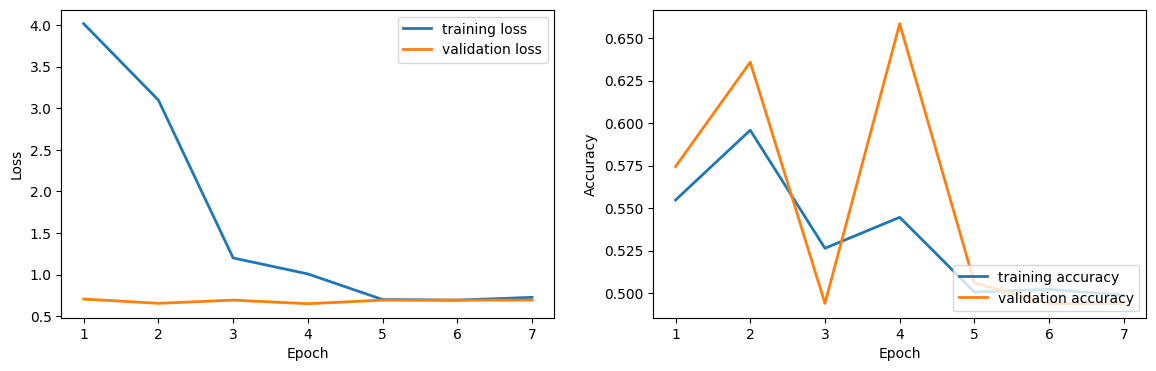

In [5]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"accuracy"], lw=2, label='training accuracy')
plt.plot(logs.loc[1:,"val_accuracy"], lw=2, label='validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

### Create predictions for all test images

In [6]:
%%time

folder_path = "/kaggle/input/private-u-tad-dogs-vs-cats-2024/test/test/"

discrimination_threshold = 0.5  # below 0.5 is a cat, above 0.5 is a dog
predictions_dict = {}

for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    
    # save the image name
    file_name = img.split('/')[-1]
    file_no_extension = file_name.split('.')[0]
    
    img = keras.utils.load_img(img, target_size=image_size)
    img_array = keras.utils.img_to_array(img)
    img_array = keras.ops.expand_dims(img_array, 0)
    predictions = model.predict(img_array, verbose=None)
    score = predictions[0][1]
    label = (score > discrimination_threshold )*1
    
    # save the predictions to a dictionary
    predictions_dict[int(file_no_extension)] = label

CPU times: user 1min 56s, sys: 11.2 s, total: 2min 7s
Wall time: 2min 30s


### Save predictions to a competition submission file

In [7]:
submission = pd.DataFrame(predictions_dict.items(), columns=["id", "label"]).sort_values(by='id', ascending=True)
submission.to_csv('submission.csv',index=False)

# print numbers of each class label
submission["label"].value_counts()

label
1    1067
Name: count, dtype: int64

In [8]:
submission

,id,label
292,1,1
1031,2,1
863,3,1
830,4,1
78,5,1
...,...,...
712,1063,1
525,1064,1
951,1065,1
470,1066,1
